# Functional API
- Sequential 모델은 각 Layer들의 입력과 출력이 하나라고 가정한다. 그리고 각각의 Layer(입력층, 은닉층, 출력층)들을 차례대로 쌓아 구성한다. 그래서 다양한 구조의 네트워크를 만드는데 한계가 있다
- 함수형 API를 사용하면 **다중입력, 다중출력, 그래프 형태**의 다양한 형태의 레이어들을 유연하게 구성할 수 있다
- Functional API는 직접 텐서들의 입출력을 다룬다
- 함수호출처럼 Layer를 이용하여 입력 텐서(Input Tensor)를 입력받고 그 결과를 출력 텐서(Output Tensor)로 반환하는 형식으로 모델을 구현한다.

```python
input_tensor = Input(shape=(16, ))
dense = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(32, activation = 'sigmoid')(dense)

model = models.Model(input_shape, output_tensor)
```

## Sequential, Functional API
### Sequential

In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras import layers, models

In [2]:
seq_model = keras.Sequential()
seq_model.add(layers.Input(shape=(32, 32, 3)))

seq_model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
seq_model.add(layers.MaxPooling2D(padding='same'))
seq_model.add(layers.Flatten())

seq_model.add(layers.Dense(units=256, activation='relu'))
seq_model.add(layers.Dense(units=10, activation='softmax', name='output_layer'))
seq_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,198,922 (16.02 MB)

 Trainable params: 4,198,922 (16.02 MB)

 Non-trainable params: 0 (0.00 B)

### Functional API

In [3]:
# 레이어의 흐름 구조를 구현
input_tensor = layers.Input(shape = (32, 32, 3))

conv_tensor = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(input_tensor)
pool_tensor = layers.MaxPooling2D(padding='same')(conv_tensor)
flatten_tensor = layers.Flatten()(pool_tensor)
dense_tensor = layers.Dense(256, activation='relu')(flatten_tensor)
output_tensor = layers.Dense(10, activation='softmax')(dense_tensor)

# 모델 생성 -> input들과 output들을 넣어서 생성
fn_model = models.Model(input_tensor, output_tensor)

In [4]:
fn_model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,198,922 (16.02 MB)

 Trainable params: 4,198,922 (16.02 MB)

 Non-trainable params: 0 (0.00 B)

### 각 Layer의 출력 변수들 통일
- 일반적으로 block 단위로 동일한 변수명을 사용
- hidden layer들의 출력결과는 모두 동일한 변수명을 사용

In [5]:
input_tensor = layers.Input(shape=(32, 32, 3))

x1 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(input_tensor)
x1 = layers.MaxPooling2D(padding='same')(x1)

x2 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(x1)
x2 = layers.MaxPooling2D(padding='same')(x2)

x3 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(x2)
x3 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(x3)
x3 = layers.MaxPooling2D(padding='same')(x3)

x4 = layers.Flatten()(x3)
output_tensor = layers.Dense(10, activation='softmax')(x4)

model3 = models.Model(input_tensor, output_tensor)

model3.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,978 (38.98 KB)

 Trainable params: 9,978 (38.98 KB)

 Non-trainable params: 0 (0.00 B)

### trainable 설정

In [6]:
input_tensor = layers.Input(shape=(32, 32, 3))

c1 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')
c1.trainable = False
x1 = c1(input_tensor)

x1 = layers.MaxPooling2D(padding='same')(x1)

x2 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(x1)
x2 = layers.MaxPooling2D(padding='same')(x2)

x3 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(x2)
x3 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(x3)
x3 = layers.MaxPooling2D(padding='same')(x3)

x4 = layers.Flatten()(x3)
output_tensor = layers.Dense(10, activation='softmax')(x4)

model3 = models.Model(input_tensor, output_tensor)

model3.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,978 (38.98 KB)

 Trainable params: 9,530 (37.23 KB)

 Non-trainable params: 448 (1.75 KB)

### Transfer learning

In [7]:
backbone = applications.VGG16(include_top=False)
backbone.trainable=False

input_tensor = layers.Input(shape=(224, 224, 3))
x = backbone(input_tensor)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(512, activation='relu')(x)
output_tensor = layers.Dense(1, activation='sigmoid')(x)
output_tensor2 = layers.Dense(10, activation='softmax')(x)

model4 = models.Model(input_tensor, [output_tensor, output_tensor2])
model4.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 7, 7, 512) │ 14,714,688 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 512)       │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 512)       │    262,656 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 1)         │        513 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 10)        │      5,130 │ dense_5[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,982,987 (57.16 MB)

 Trainable params: 268,299 (1.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

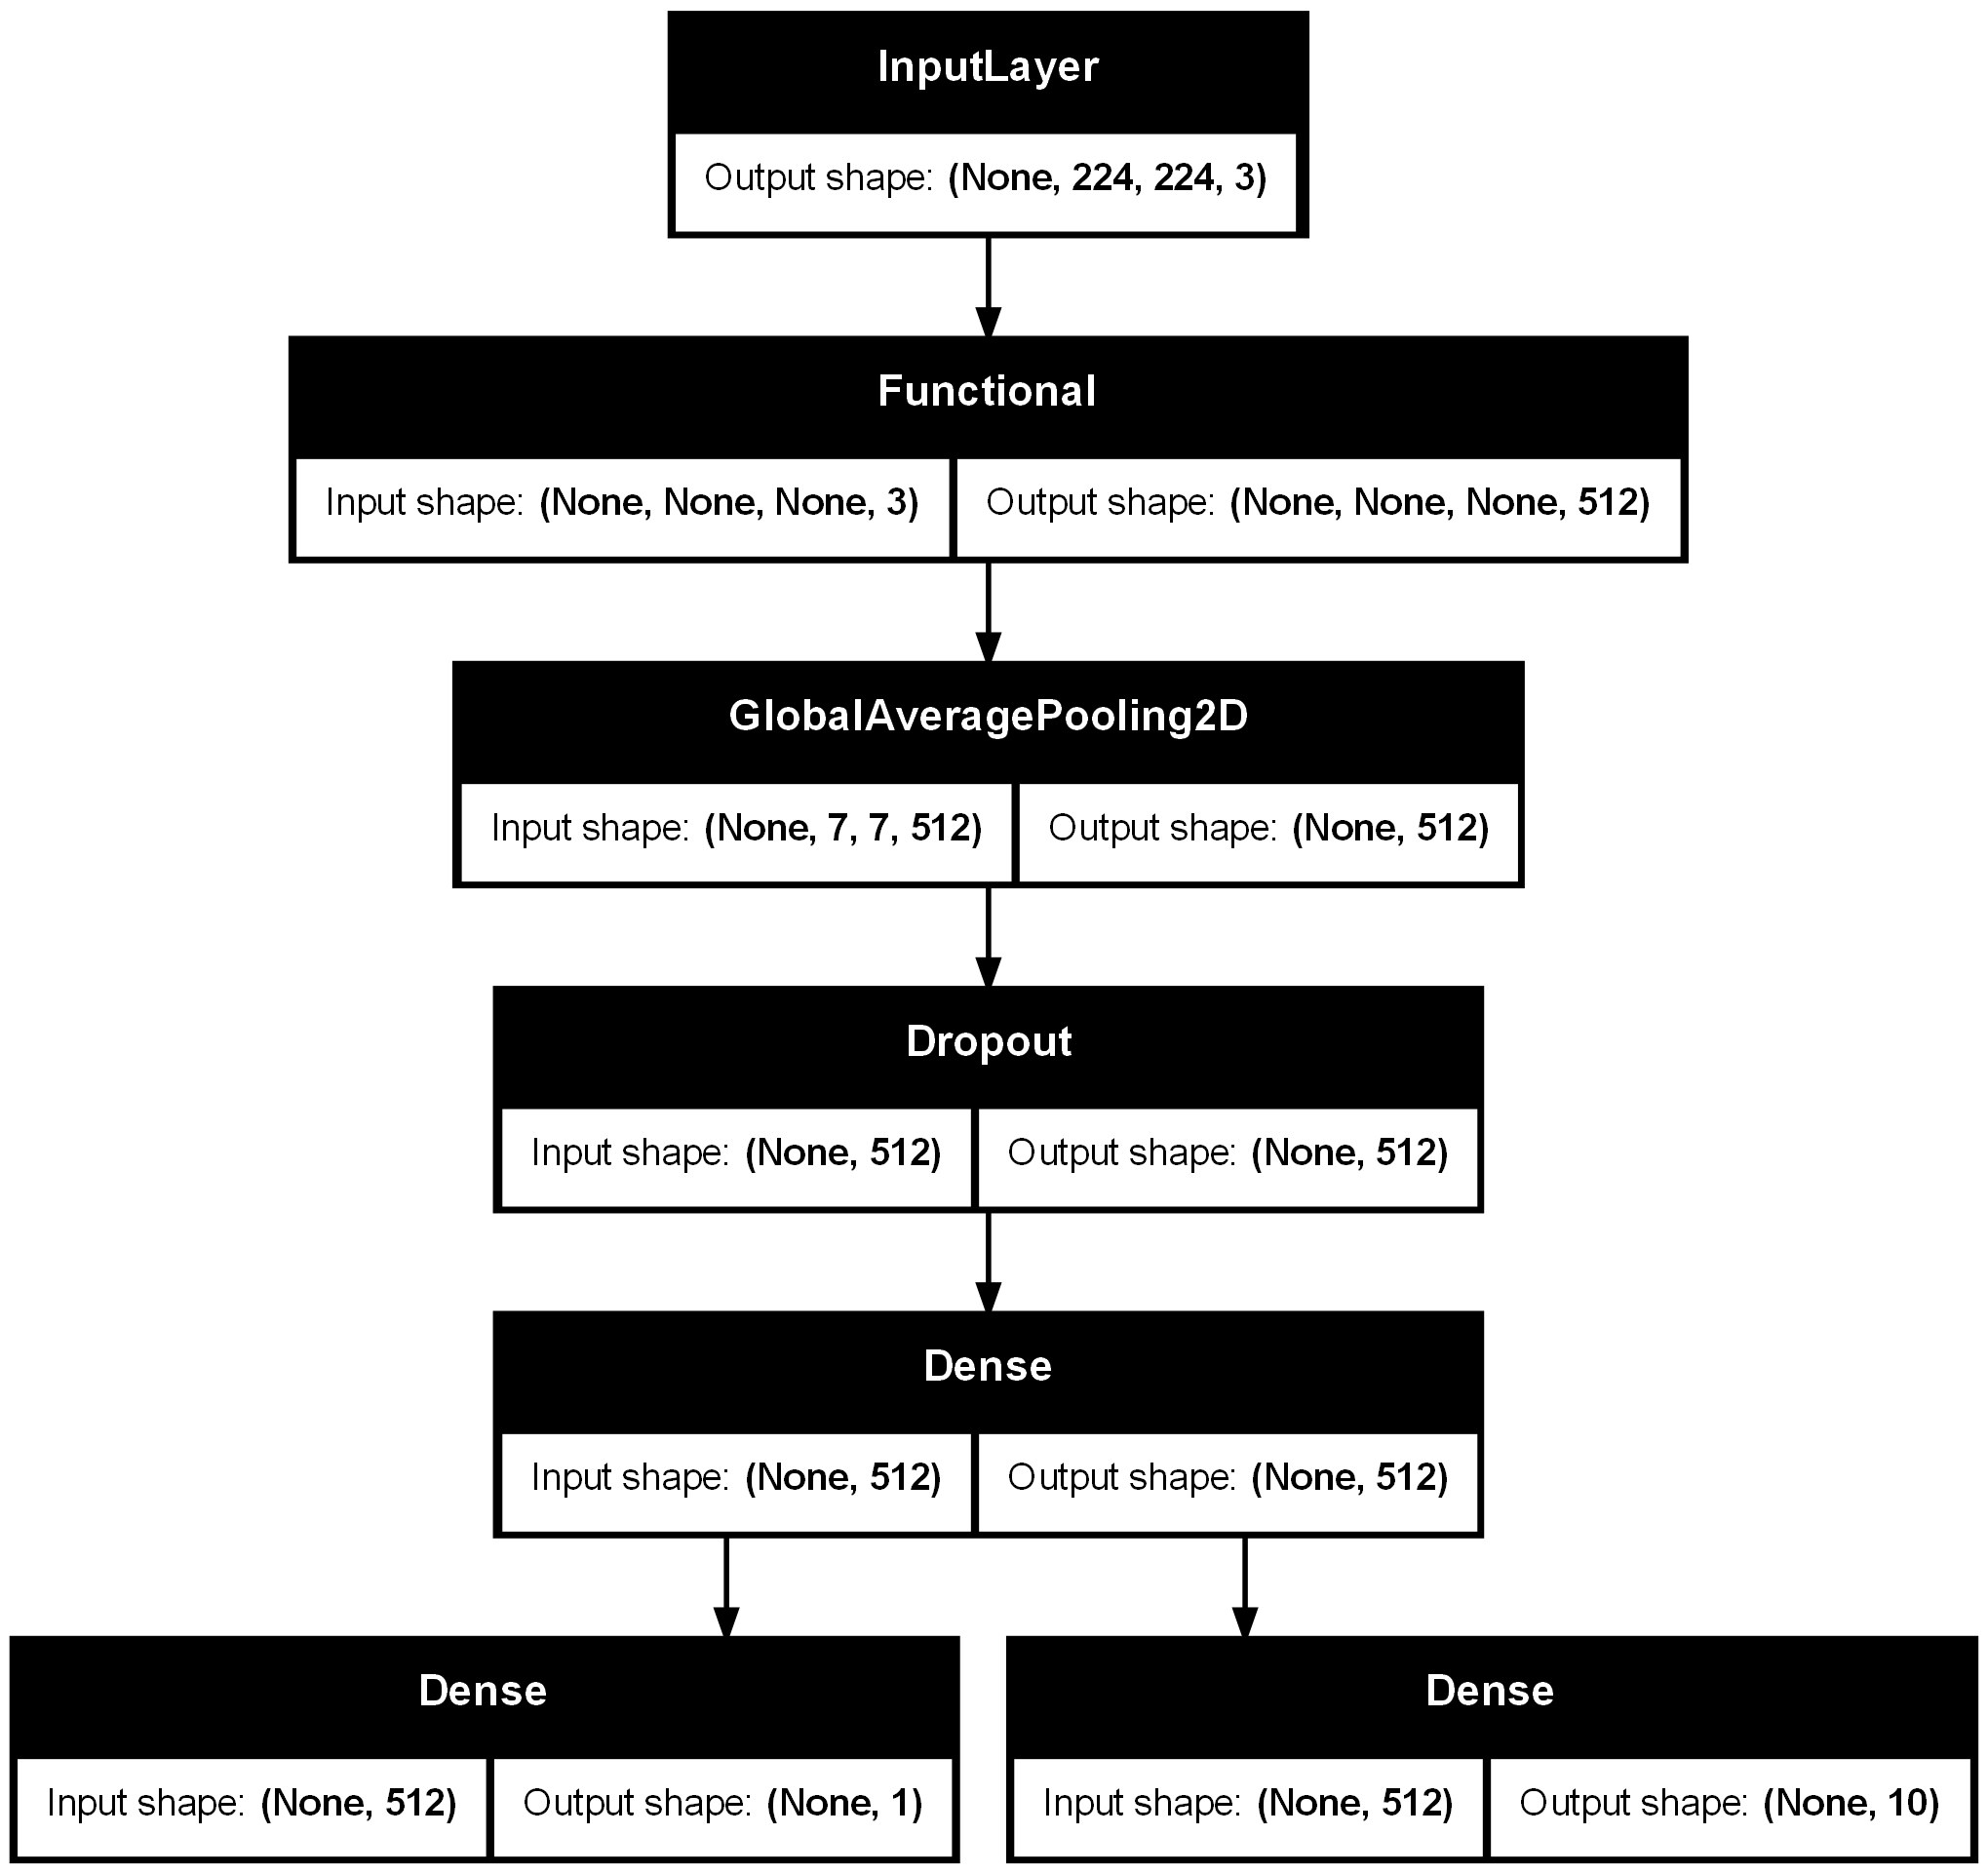

In [9]:
keras.utils.plot_model(model4, show_shapes=True)

### 여러개의 출력결과를 합치는 Layer
- 앞 레이어들에서 출력된 값이 여러개이고 이것을 하나의 Layer의 입력으로 넣어 줄 경우 **여러개의 출력값을 합쳐 줘야 한다.** 이때 단순히 합치거나 element wise 연산을 통해 합칠수 있다
- 함수와 Layer class 두가지 방식을 제공
    - tensorflow.keras.layers 모듈로 제공
- **concatenate(list, axis=-1)/Concatenate(axis=-1)([list])**
    - 레이어들을 단순히 합친다(붙이는 처리)
    - list: 합칠 레이어들을 리스트에 묶어 전달
    - axis: 합칠 기준 축 (기본값: -1(마지막 축 기준))
- **add(list)/Add()(list), substract(list)/Substract()(list), multiply(list)/Multiply()(list)**
    - 같은 index의 값들을 계산해서(더하기, 빼기, 곱하기) 하나의 레이어로 만든다
    - list: 합칠 레이어들을 리스트에 묶어 전달

In [10]:
# ResNet Residual Block을 구현
input_tensor = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(filters=64, kernel_size=7, padding='same', activation='relu')(input_tensor)
x = layers.MaxPooling2D(padding='same')(x)

# residual block : x-input
x1 = layers.Conv2D(filters=64, kernel_size=3, padding='same')(x)
x1 = layers.BatchNormalization()(x1)
x1 = layers.ReLU()(x1)
x1 = layers.Conv2D(filters=128, kernel_size=3, padding='same')(x1)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Conv2D(filters=64, kernel_size=1, padding='same')(x1)
x1 = layers.Add()([x, x1])

output_tensor = layers.ReLU()(x1)

rb_model = models.Model(input_tensor, output_tensor)

In [11]:
rb_model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 32, 32,    │      9,472 │ input_layer_6[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 16, 16,    │          0 │ conv2d_10[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 16, 16,    │     36,928 │ max_pooling2d_8[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 16, 16,    │        256 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 16, 16,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 16, 16,    │     73,856 │ re_lu[0][0]       │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        512 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 16, 16,    │      8,256 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 16, 16,    │          0 │ max_pooling2d_8[… │
│                     │ 64)               │            │ conv2d_13[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 16, 16,    │          0 │ add[0][0]         │
│                     │ 64)               │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 129,280 (505.00 KB)

 Trainable params: 128,896 (503.50 KB)

 Non-trainable params: 384 (1.50 KB)

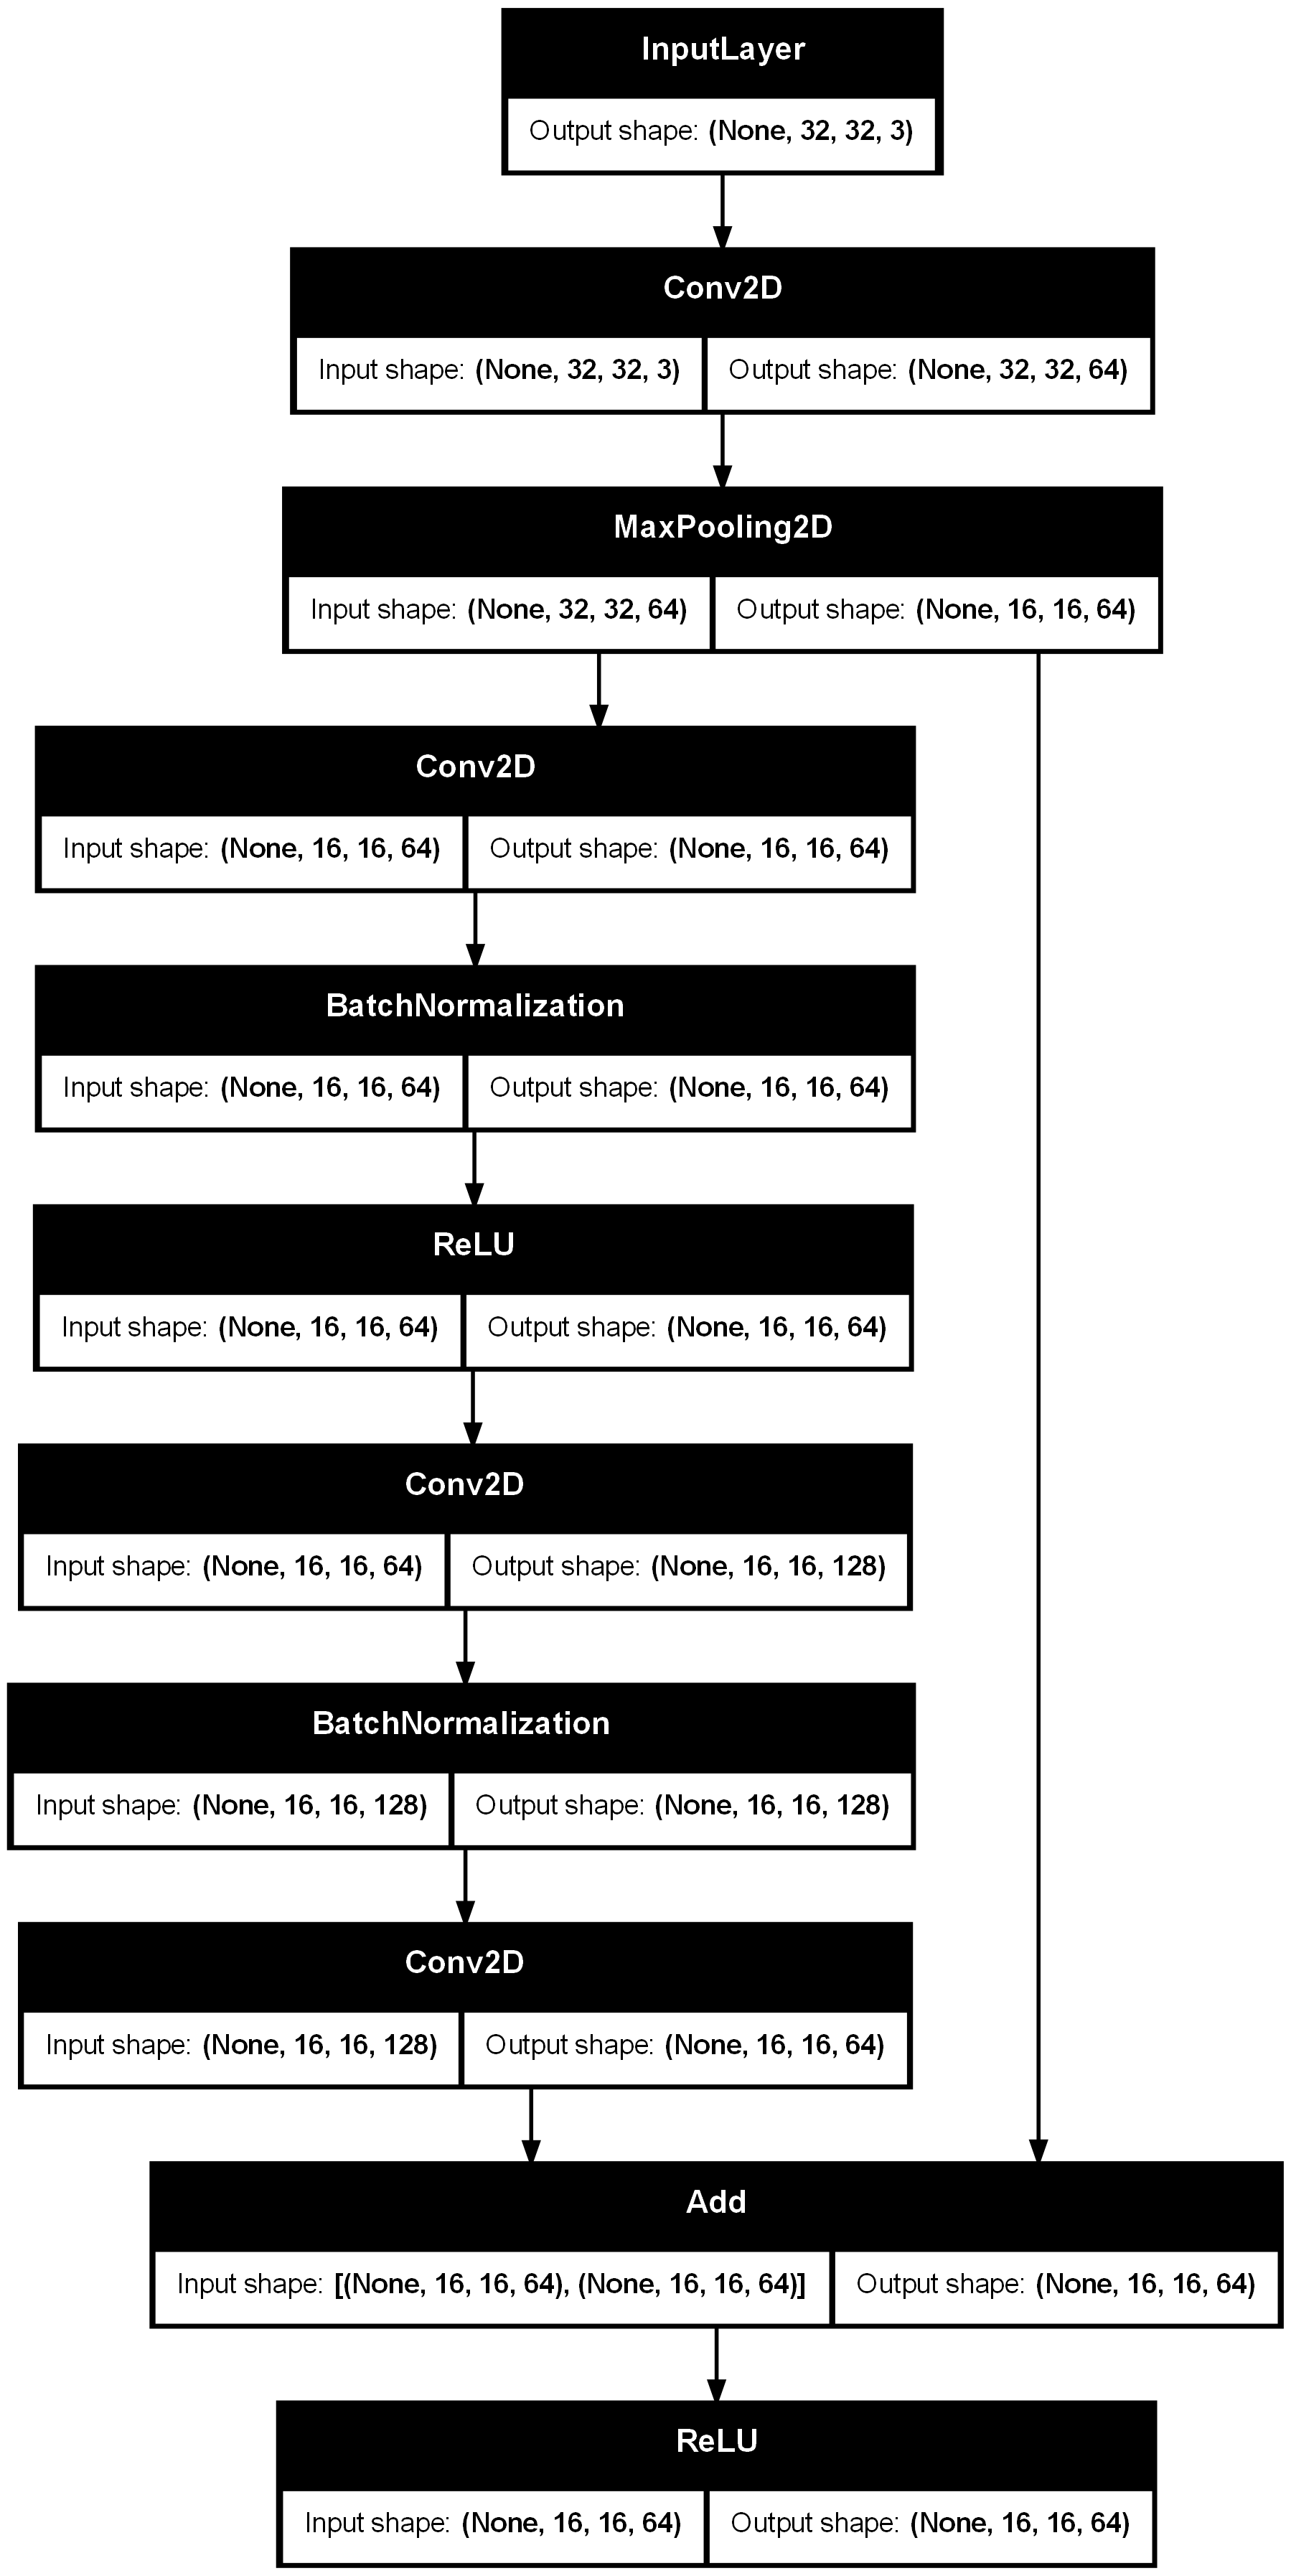

In [12]:
keras.utils.plot_model(rb_model, show_shapes=True)

## 다중 출력 모델
- 가정
    - iris 데이터셋에서 꽃받침의 너비와 높이로 꽃잎의 너비, 높이, 꽃 종류를 예측하는 모델
    - 출력 결과가 3개
- X: 꽃받침 너비, 높이
- y: 꽃잎 너비, 높이, 꽃 종류

In [13]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y = True)
X.shape

(150, 4)

In [14]:
# X, y의 형태 변환

# y1: petal length, y2: petal width, y3: target
y1 = X[:, 2]
y2 = X[:, 3]
y3 = y

# X: sepal length, width
X = X[:, [0, 1]]
X.shape, y1.shape, y2.shape, y3.shape

((150, 2), (150,), (150,), (150,))

### 모델 정의 및 컴파일

In [15]:
# 모델 정의 - 입력: X, 출력: y1, y2, y3 (다중 출력)
# 다중 출력을 해야하기 때문에 Sequential 대신 함수 형식으로 작성
input_tensor = layers.Input(shape=(2, ))
x = layers.Dense(units=16, activation='relu')(input_tensor)
x = layers.Dense(units=8, activation='relu')(x)

# output layer
output_tensor1 = layers.Dense(1, name='petal_length_output')(x)
output_tensor2 = layers.Dense(1, name='petal_width_output')(x)
output_tensor3 = layers.Dense(3, activation='softmax', name='species_output')(x)

model = models.Model(input_tensor, [output_tensor1, output_tensor2, output_tensor3])

In [16]:
model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 16)        │         48 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 8)         │        136 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ petal_length_output │ (None, 1)         │          9 │ dense_9[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ petal_width_output  │ (None, 1)         │          9 │ dense_9[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ species_output      │ (None, 3)         │         27 │ dense_9[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 229 (916.00 B)

 Trainable params: 229 (916.00 B)

 Non-trainable params: 0 (0.00 B)

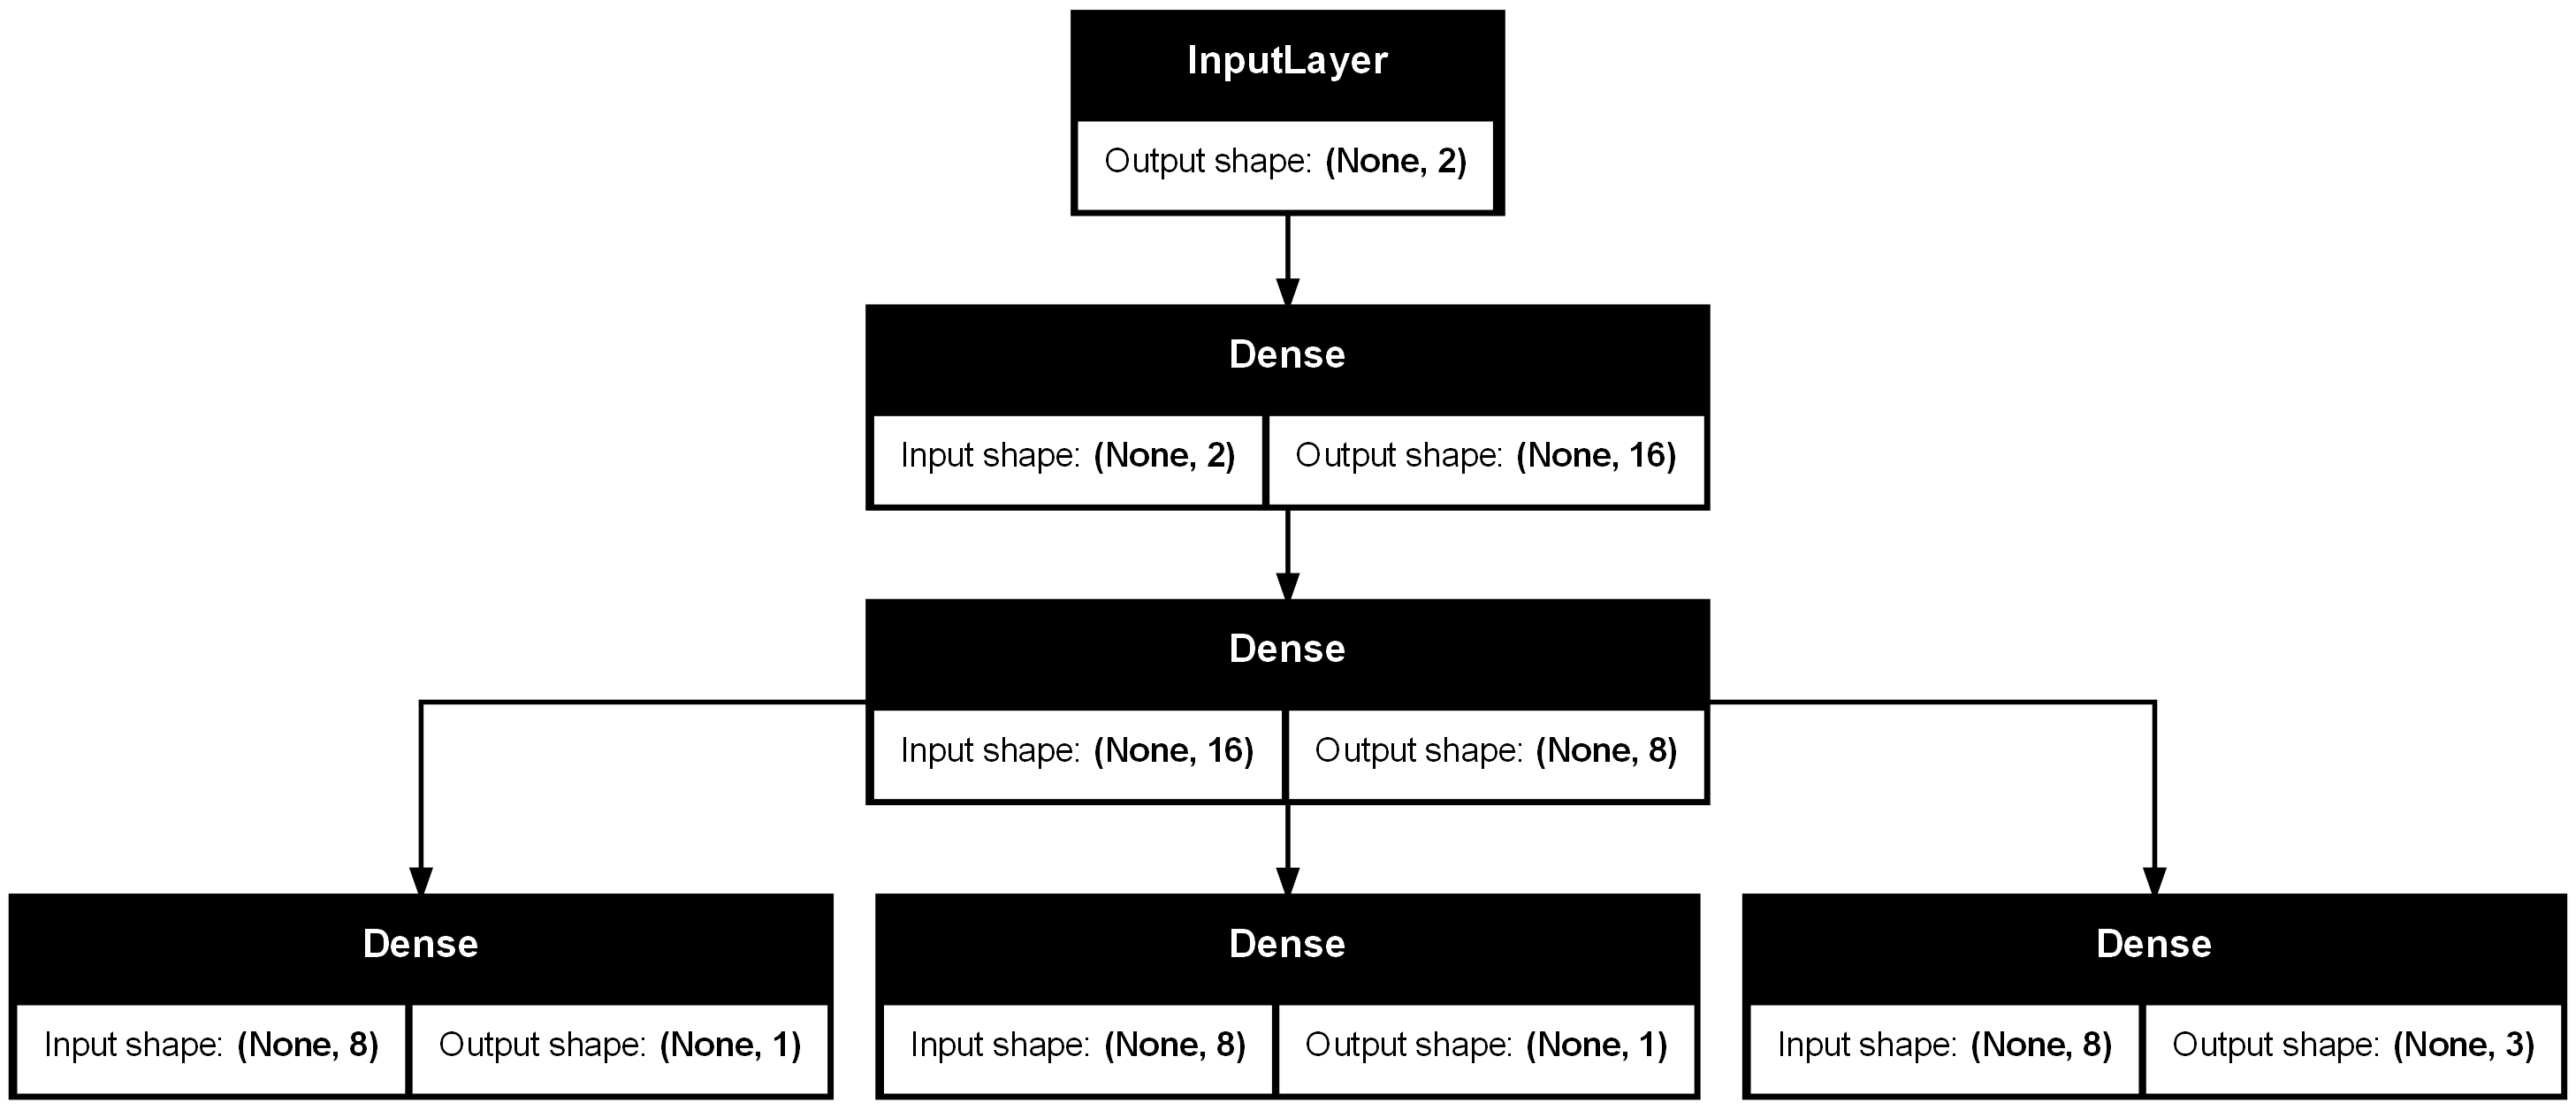

In [17]:
keras.utils.plot_model(model, show_shapes=True)

In [18]:
# compile
model.compile(optimizer='adam', loss=['mse', 'mse', 'sparse_categorical_crossentropy'])

### 학습

In [22]:
hist = model.fit(X, [y1, y2, y3], epochs = 100, validation_split=0.2)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.1085 - val_loss: 2.2830
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2209 - val_loss: 2.3095
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1319 - val_loss: 2.3596
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0731 - val_loss: 2.3726
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0876 - val_loss: 2.3534
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1842 - val_loss: 2.2938
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1949 - val_loss: 2.2617
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2048 - val_loss: 2.2869
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1177 - val_loss: 2.3539
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1459 - val_loss: 2.3422
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1003 - val_loss: 2.3100
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0403 - val_loss: 2.3082

### 새로운 데이터 추론

In [23]:
new_x = X[:10]
pred = model.predict(new_x)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


[array([[1.6010683],
        [2.214811 ],
        [1.4788662],
        [1.4910722],
        [1.3699936],
        [1.4897869],
        [1.131584 ],
        [1.6177597],
        [1.5244547],
        [2.021358 ]], dtype=float32),
 array([[0.35430974],
        [0.6025024 ],
        [0.32371324],
        [0.33455566],
        [0.22319566],
        [0.25364622],
        [0.12568063],
        [0.36542323],
        [0.3567828 ],
        [0.5271807 ]], dtype=float32),
 array([[0.8876531 , 0.08527429, 0.02707247],
        [0.6573874 , 0.24700207, 0.09561054],
        [0.8700716 , 0.0967882 , 0.03314023],
        [0.85539335, 0.10665047, 0.03795616],
        [0.91391116, 0.0692924 , 0.01679638],
        [0.92616266, 0.06024688, 0.01359046],
        [0.91485965, 0.06974923, 0.01539112],
        [0.87358093, 0.09521374, 0.03120532],
        [0.8187618 , 0.13140075, 0.04983741],
        [0.73777735, 0.19138937, 0.07083328]], dtype=float32)]

In [24]:
for pl, pw, s in zip(pred[0], pred[1], pred[2]):
    print(pl, pw, s, s.argmax(-1))

[1.6010683] [0.35430974] [0.8876531  0.08527429 0.02707247] 0
[2.214811] [0.6025024] [0.6573874  0.24700207 0.09561054] 0
[1.4788662] [0.32371324] [0.8700716  0.0967882  0.03314023] 0
[1.4910722] [0.33455566] [0.85539335 0.10665047 0.03795616] 0
[1.3699936] [0.22319566] [0.91391116 0.0692924  0.01679638] 0
[1.4897869] [0.25364622] [0.92616266 0.06024688 0.01359046] 0
[1.131584] [0.12568063] [0.91485965 0.06974923 0.01539112] 0
[1.6177597] [0.36542323] [0.87358093 0.09521374 0.03120532] 0
[1.5244547] [0.3567828] [0.8187618  0.13140075 0.04983741] 0
[2.021358] [0.5271807] [0.73777735 0.19138937 0.07083328] 0


In [25]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 다중 입력 모델
- 가정
    - IRIS 꽃 데이터 + 꽃의 사진을 입력해서 꽃의 종류를 예측한다
- X: 꽃 데이터, 꽃 사진
- y: 꽃 종류

### 데이터 로드

In [26]:
X, y = load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [27]:
(X_train, _), (_, _) = keras.datasets.mnist.load_data()
X_img = X_train[:150]
X_train.shape, X_img.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


((60000, 28, 28), (150, 28, 28))

### 모델 생성, 컴파일

In [29]:
# table 데이터와 영상데이터 두개를 입력으로 받는 모델
# table 데이터는 Dense Layer를 영상데이터는 Conv Layer를 이용해 Feature Extraction을 처리
# 추출된 두가지 특징을 합쳐서 품종을 추론하는 모델

iris_info_tensor = layers.Input(shape=(4, ))
x1 = layers.Dense(units=32, activation='relu')(iris_info_tensor)
x1 = layers.Dense(units=16, activation='relu')(x1)

iris_img_tensor = layers.Input(shape=(28, 28, 1))
x2 = layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(iris_img_tensor)
x2 = layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x2)
x2 = layers.MaxPooling2D(padding='same')(x2)

x2 = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x2)
x2 = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x2)
x2 = layers.MaxPooling2D(padding='same')(x2)
x2 = layers.Flatten()(x2)

# x1과 x2를 합치기
x3 = layers.Concatenate()([x1, x2])

# output layer
output_tensor = layers.Dense(units = 3, activation='softmax')(x3)

# 모델 생성
model2 = models.Model([iris_info_tensor, iris_img_tensor], output_tensor)

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
import numpy as np

iris_img = X_img[..., np.newaxis]
iris_img.shape

(150, 28, 28, 1)

In [32]:
model2.fit([X, iris_img], y, epochs = 100, validation_split = 0.2)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.3185 - loss: 6.3971 - val_accuracy: 0.0000e+00 - val_loss: 24.5227
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5277 - loss: 4.2384 - val_accuracy: 0.0000e+00 - val_loss: 12.3234
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5306 - loss: 1.7477 - val_accuracy: 0.0667 - val_loss: 3.2882
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5288 - loss: 1.1359 - val_accuracy: 0.4000 - val_loss: 1.2650
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6198 - loss: 0.7614 - val_accuracy: 0.0333 - val_loss: 2.5746
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7342 - loss: 0.5974 - val_accuracy: 0.0000e+00 - val_loss: 3.2362
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7990 - loss: 0.4868 - val_accuracy: 0.0000e+00 - val_loss: 2.8292
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9319 - loss: 0.3332 - val_accuracy: 

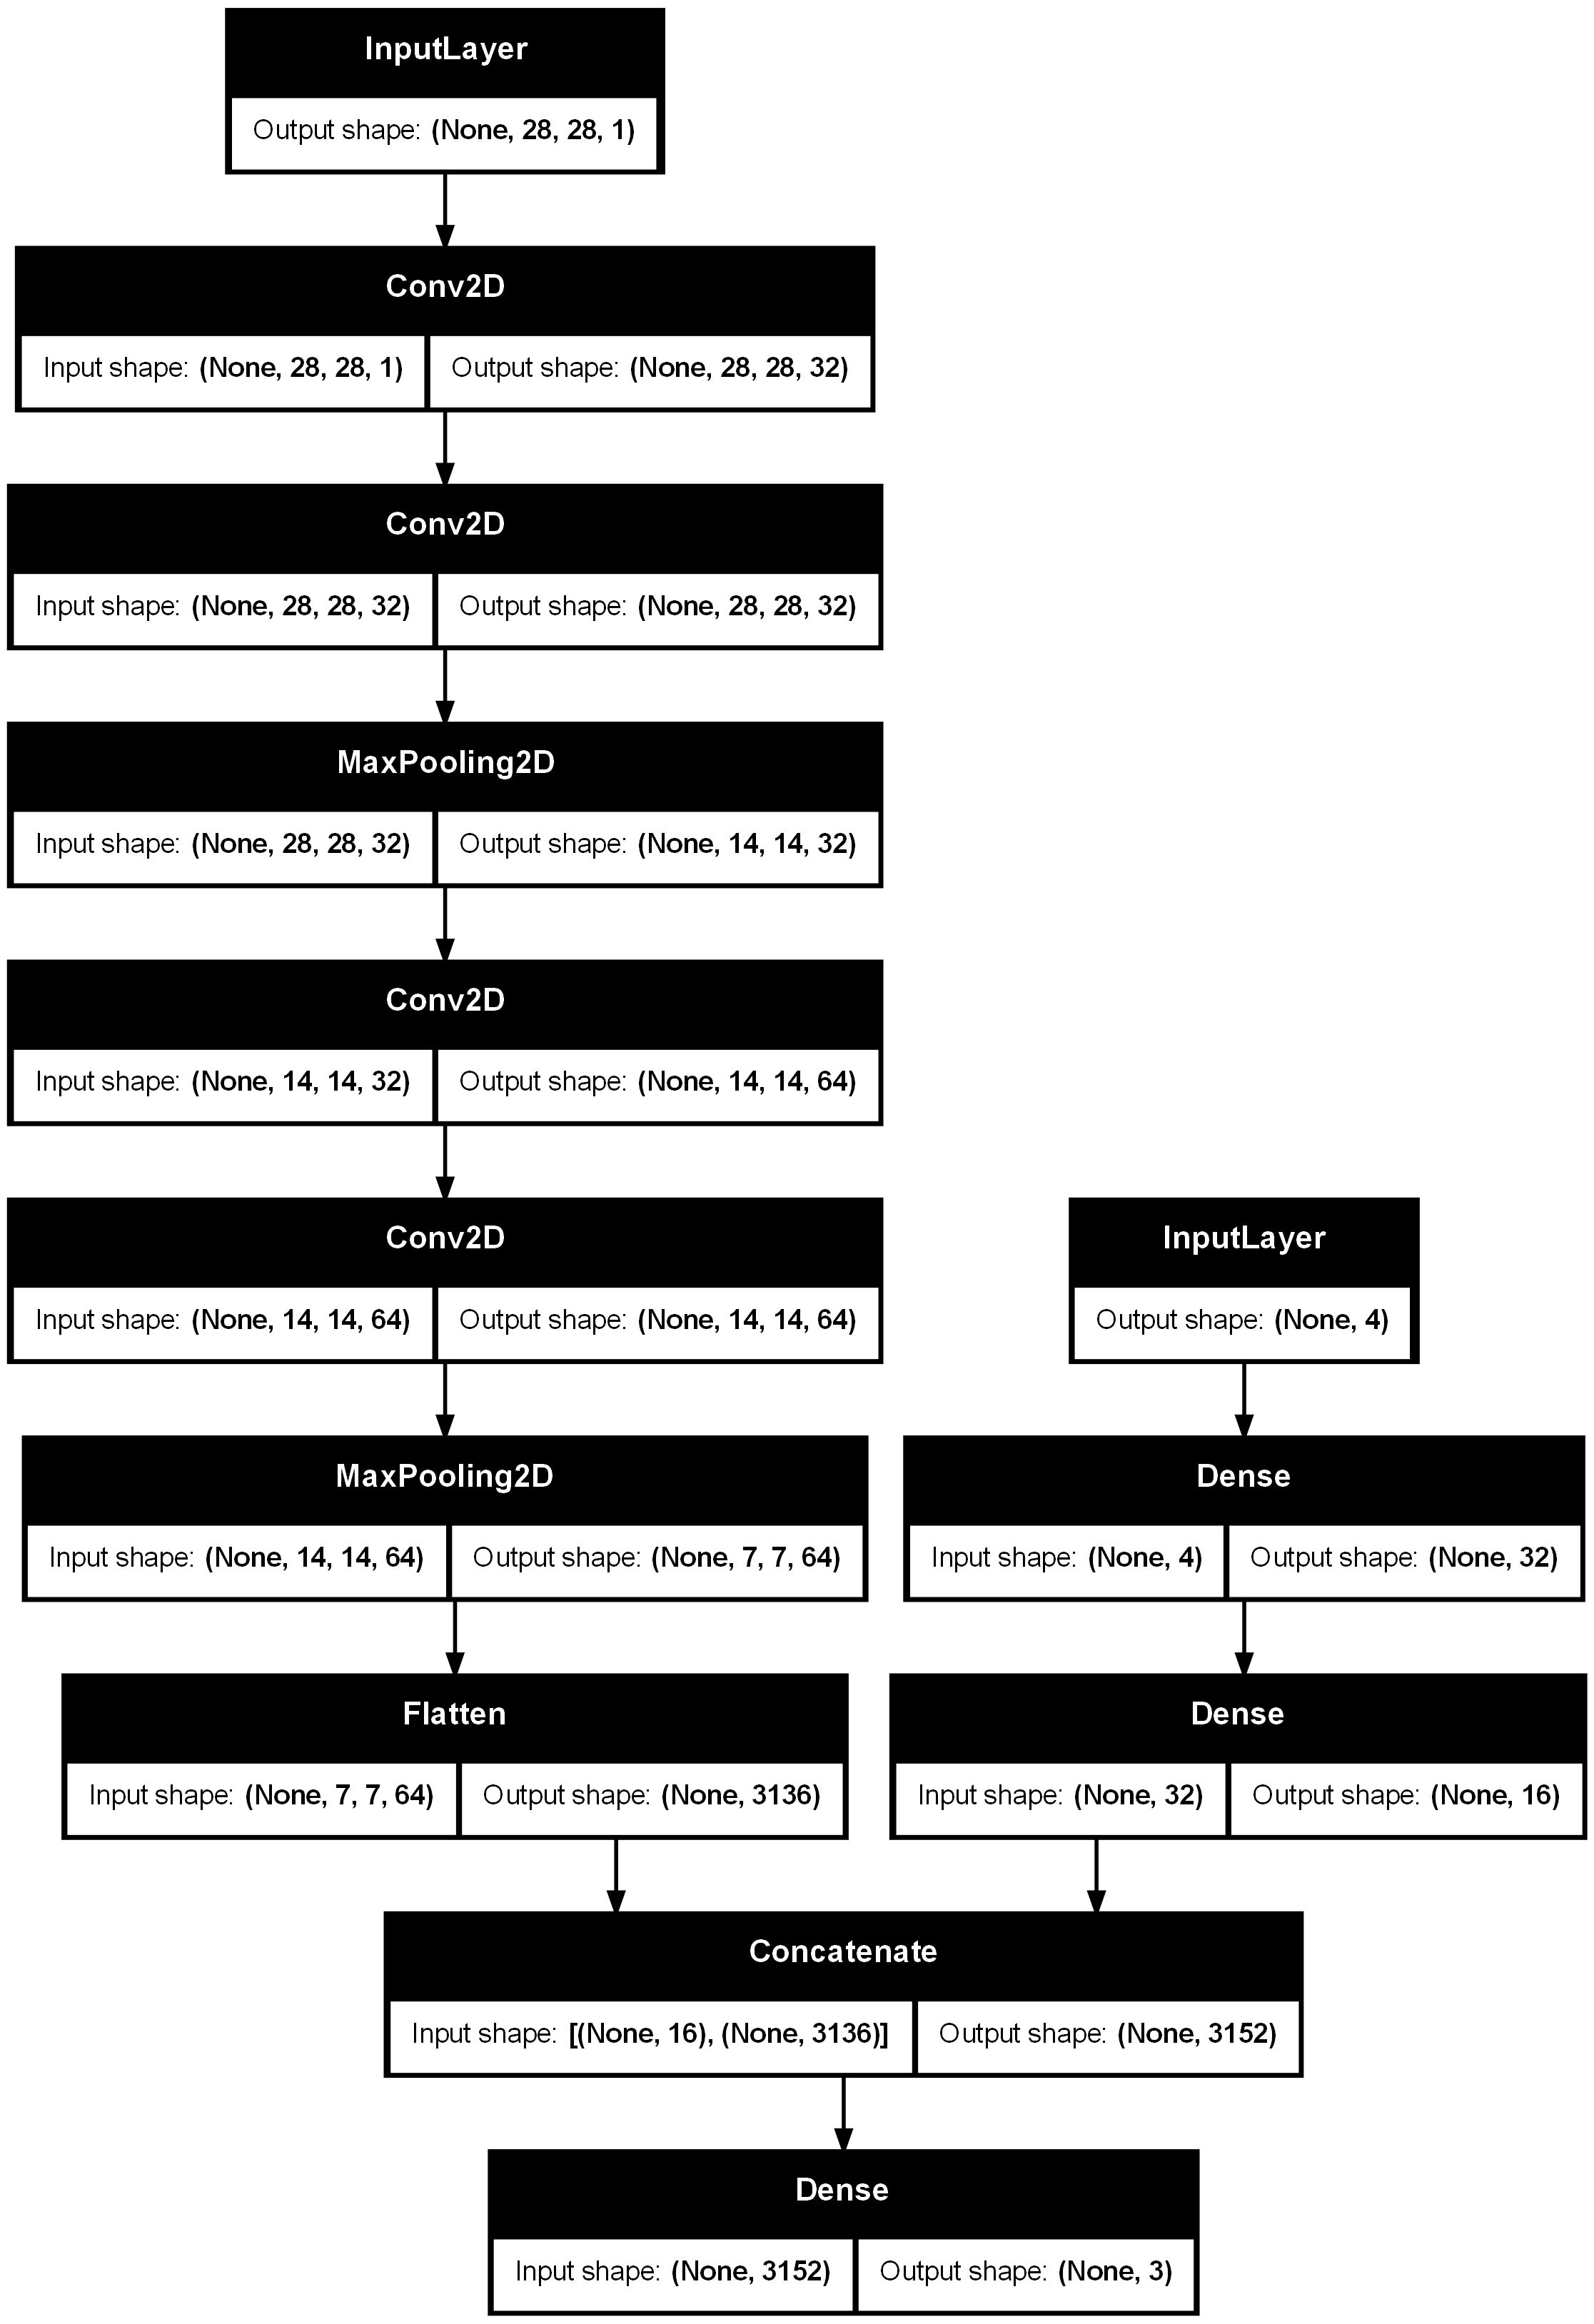

In [33]:
keras.utils.plot_model(model2, show_shapes=True)

## Subclass 방식
- 모델을 class로 구현
- \_\_init\_\_() 메소드에서 모델에 필요한 자원들(layer들)을 생성
- call() 메소드에서 모델구조 정의

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [36]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [37]:
class MnistModel(models.Model):
    
    def __init__(self):
        super().__init__()
        self.conv_block1 = keras.Sequential([
            layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
            layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
            layers.MaxPooling2D(padding='same')
        ])
        
        self.conv_block2 = keras.Sequential([
            layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
            layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
            layers.MaxPooling2D(padding='same')
        ])
        
        self.flatten = layers.Flatten()
        self.output_layer = layers.Dense(units=10, activation='softmax')
        
    def call(self, x):
        # input data를 받아서 forward propagation을 처리
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.flatten(x)
        output_tensor = self.output_layer(x)
        return output_tensor

In [38]:
# 모델생성
model = MnistModel()

# 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# 학습
hist = model.fit(X_train, y_train, epochs=3, validation_split=0.25)

Epoch 1/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - loss: 0.3193 - val_loss: 0.0548
Epoch 2/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - loss: 0.0439 - val_loss: 0.0483
Epoch 3/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 0.0299 - val_loss: 0.0394
